Numerical Method CPSMA 441 Prof: Nicholas Jacobs

Member(s): Hoang Tan Truong, Aakriti Khadka

**Questions**

In [ ]:
# 1) (a) Create an algorithm for finding roots of a function when both the function and derivative are
# known using the Newton-Raphson method.
# As we know both the function and derivative as provided in question we could just pass it to the function and find the roots
# Below is the implementation of the function where along with function and derivative we also pass intial guess for the root and the epsilon 
# for the precision of estimated root.
def newton_raphson(func, deriv,x0,epsilon):
  count = 0
  while True:
    func_x = func(x0)
    deriv_fx = deriv(x0)
    x1 = x0 - func_x / deriv_fx
    if abs(x1 - x0) < epsilon:
        return x1, count
    count += 1
    x0 = x1

# Here is the example:
def func(x):
    return x**3 - 2*x - 5

def deriv(x):
    return 3*x**2 - 2
root,iteration = newton_raphson(func, deriv, 1.5, 1e-6)
print(root, iteration)

# 1) (b) Apply the algorithm to your function f from Part 1 using several initial seeds. Use an error
# tolerance of 0.01%.
# Here we initialized a variable with several initial seeds and passsed to the function
tolerance = 0.0001
seeds = [-3, -2, -1, 0, 1, 2, 3]

for seed in seeds:
    root,iteration = newton_raphson(func, deriv, seed, tolerance)
    print(f"Root with seed {seed}: {root:.4f} (converged in {iteration} iterations)")

# 1) (c) Create a table of your data include the estimate of the root found and how many iterations it
# took to converge.
print("Initial Seed\tEstimated root\tIterations to Converge")
print("-----------------------------------------------------")
for seed in seeds:
    root, iteration = newton_raphson(func, deriv, seed, tolerance)
    print(f"{seed}\t\t{root:.4f}\t\t{iteration}")


2.0945514815423265 5
Root with seed -3: 2.0946 (converged in 5 iterations)
Root with seed -2: 2.0946 (converged in 6 iterations)
Root with seed -1: 2.0946 (converged in 5 iterations)
Root with seed 0: 2.0946 (converged in 17 iterations)
Root with seed 1: 2.0946 (converged in 7 iterations)
Root with seed 2: 2.0946 (converged in 2 iterations)
Root with seed 3: 2.0946 (converged in 4 iterations)
Initial Seed	Estimated root	Iterations to Converge
-----------------------------------------------------
-3		2.0946		5
-2		2.0946		6
-1		2.0946		5
0		2.0946		17
1		2.0946		7
2		2.0946		2
3		2.0946		4


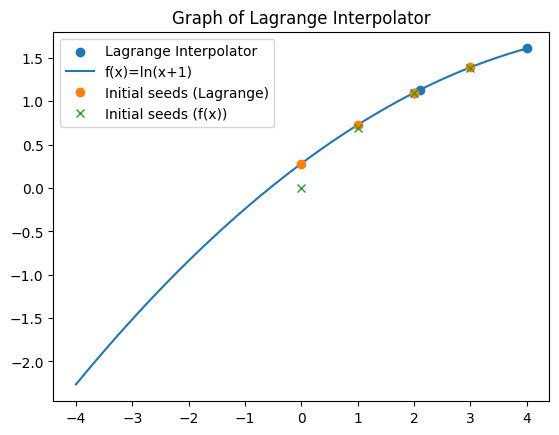

Root: -4.8924 with 7 iterations.
Root: -3.6586 with 6 iterations.
Root: -2.2496 with 5 iterations.
Root: -0.5588 with 3 iterations.


In [ ]:
# 2) (a) Create an algorithm for finding roots of a function using one of the above choices
# I choosed false-position algorithm for finding roots of a function. Below is the implementation of the function
# In the function we check if function of a and b have opposite signs and then perform the false-position algorithm afterwards.
def false_position(func, a, b, epsilon):
    count = 0
    while True:
        count += 1
        c = (a*func(b) - b*func(a))/(func(b) - func(a))
        if abs(func(c)) < epsilon:
            return c, count
        elif func(c)*func(a) < 0:
            b = c
        else:
            a = c
# 2) (b) Use Lagrange Interpolation from Project Module 2. Interpolate f from Project Module 1 and
# the points (center, f(center)), (center + 0.1, f(center + 0.1)), (center + 0.2, f(center + .02) and
# (2center, f(2center)) to create a function for applying your algorithm.
# Below is the function we used: 
import math
import numpy as np
import matplotlib.pyplot as plt

def function(x):
    return math.log(x+1)

def lagrangeCoef(inp, outp, entry, var):
    coef = 1
    for i in range(len(inp)):
        if i == entry:
            continue
        else:
            coef = coef*(var - inp[i])/(inp[entry] - inp[i])
    return coef

def lagrangeInterpolator(inp, outp, var):
    interp = 0
    for i in range(len(inp)):
        interp = interp + lagrangeCoef(inp, outp, i, var)*outp[i]
    return interp

# Defining the interpolation points
center = 1
point1 = (center, function(center))
point2 = (center + 0.1, function(center + 0.1))
point3 = (center + 0.2, function(center + 0.2))
point4 = (2*center, function(2*center))

# Interpolating a function that passes through the points using Lagrange Interpolation
interp_func = lambda x: lagrangeInterpolator([point1[0], point2[0], point3[0], point4[0]], [point1[1], point2[1], point3[1], point4[1]], x)

# 2) (c) Graph your Lagrange Interpolation and use the graph to inform your decision on points to choose
# for initial seeds in your algorithm
seeds = [0, 1, 2, 3]

inpValue = [2, 2.1, 4]
outpValue = [function(x) for x in inpValue]

x = np.arange(-4, 4, 0.001)

y1 = [lagrangeInterpolator(inpValue, outpValue, s) for s in seeds]
y2 = [function(s) for s in seeds]

plt.scatter(inpValue, outpValue)
plt.plot(x, lagrangeInterpolator(inpValue, outpValue, x))
plt.plot(seeds, y1, 'o')
plt.plot(seeds, y2, 'x')
plt.title('Graph of Lagrange Interpolator')
plt.legend(['Lagrange Interpolator', 'f(x)=ln(x+1)', 'Initial seeds (Lagrange)', 'Initial seeds (f(x))'])

plt.show()

# 2) (d) Apply your algorithm to the Lagrange Interpolation and estimate all three roots with an error
# tolerance of 0.01%. Create a table of your data include the number of iterations.
# Applying the false position algorithm to the interpolated function
tolerance = 0.0001
a = 0
b = 2
# root, iterations = false_position(interp_func, a, b, tolerance)
seeds = [-3, -2, -1, 0]

for seed in seeds:
    try:
        root, iterations  = false_position(lambda x: lagrangeInterpolator(inpValue, outpValue, x) - seed, a, b, tolerance)
        print(f"Root: {root:.4f} with {iterations} iterations.")
    except ValueError:
        print(f"No root found for seed = {seed}")

**Review**

1)Newton-Raphson algorithm is an iterative method which is used for finding the roots of a function. It needs to have intial guess for the root and then it iterates using the formula: x_{n+1} = x_n - f(x_n)/f'(x_n). This iteration continues until a tolerance level is met. The number of iterations is the number of times the algorithm takes to converge to a root from th initial guess used. We found that the closer the initial guess is to the true root, the faster the algorithm will converge.

2) In this part we used false algorithm which is also an iterative method that uses a bracketing approach where the initial guesses for the root are two values that bracket the root, and continues to narrows down the bracket until the root is approximated within the tolerance. We used Lagrange interpolation for better and better approximation of roots of a given function. We found that Lagrange interpolation provides the initial approximation for the false position algorithm to work with, and the false position algorithm further refines the approximation of the root obtained from the Lagrange interpolation.